<h1 style="text-align:center;">Predicción de Demanda en Comercio Electrónico</h1>

# Descripción del Problema

## ¿Por qué es importante la predicción de demanda en el comercio electrónico?

<p style="text-align: justify;">La predicción de demanda es un componente esencial en la gestión de inventarios y la toma de decisiones estratégicas en el comercio electrónico. Este proceso permite anticipar las ventas futuras, lo que ayuda a evitar problemas de sobrestock o desabastecimiento. En un entorno competitivo como el comercio electrónico, la falta de conocimiento sobre las temporadas de alta o baja demanda puede resultar en pérdidas económicas significativas, afectando tanto los ingresos como la percepción de los inversionistas (Ali, N., & Shah, W., 2024).
</p>
<p style="text-align: justify;">En empresas  donde las operaciones abarcan múltiples ubicaciones y una amplia gama de productos, la predicción precisa de la demanda es crucial para optimizar los niveles de inventario, planificar campañas de marketing y tomar decisiones estratégicas sobre inversiones. Además, alcanzar los objetivos de ventas preestablecidos puede tener un impacto positivo en los precios de las acciones y en la confianza de los inversionistas.
</p>

## ¿Qué es una Serie de Tiempo?

<p style="text-align: justify;">Una serie de tiempo es un conjunto de observaciones de una variable registradas en intervalos de tiempo sucesivos. Estas observaciones pueden mostrar patrones como tendencias, estacionalidades y fluctuaciones cíclicas. En el contexto de la predicción de demanda, las series de tiempo son útiles porque permiten modelar y prever las ventas futuras basándose en datos históricos (Mrabet, Z., 2024).</p>

El análisis de series de tiempo es particularmente adecuado para resolver problemas de predicción de demanda porque:

- **Identifica patrones históricos:** Permite detectar tendencias y estacionalidades en las ventas.
- **Anticipa fluctuaciones futuras:** Utiliza patrones pasados para predecir comportamientos futuros.
- **Optimiza decisiones estratégicas:** Ayuda a planificar inventarios, campañas de marketing y recursos operativos.

## ¿Cómo utilizar una Red Neuronal para una Serie de Tiempo?

<p style="text-align: justify;">Las redes neuronales, especialmente los Perceptrones Multicapa (MLP), son herramientas poderosas para el análisis de series de tiempo debido a su capacidad para aprender patrones complejos y no lineales en los datos (Penn State Eberly College of Science, 2024). A continuación, se describe cómo se utilizan:</p>

**1. Preparación de los Datos:**

<p style="text-align: justify;">Los datos históricos se transforman en un formato adecuado para el aprendizaje supervisado. Se crean características rezagadas (lagged features) para capturar dependencias temporales. Por ejemplo, para predecir las ventas de la semana 5, se pueden utilizar las ventas de las semanas 1 a 4 como entrada. Es crucial realizar la normalización o estandarización de los datos para optimizar el rendimiento del MLP. </p>

**2. Arquitectura del Modelo:**
<p style="text-align: justify;">Un MLP consiste en una capa de entrada, una o más capas ocultas, y una capa de salida. Cada capa está completamente conectada con la siguiente, permitiendo al modelo capturar relaciones complejas en los datos. La arquitectura típica se puede implementar utilizando la clase MLPRegressor de scikit-learn, que ofrece flexibilidad en la configuración de capas ocultas y neuronas (Pandian, S., 2025).</p>

**3. Entrenamiento:**
<p style="text-align: justify;">El modelo se entrena ajustando los pesos de las conexiones neuronales mediante el algoritmo de retropropagación. Se utiliza un conjunto de datos de entrenamiento y validación para ajustar los hiperparámetros como el número de capas ocultas, neuronas por capa, tasa de aprendizaje, etc.</p>

**4. Predicción:**
<p style="text-align: justify;">Una vez entrenado, el modelo puede predecir valores futuros basándose en las secuencias de entrada.</p>

# Análisis Descriptivo

## Depuración inicial

In [362]:
# Instalamos las librerías necesarias
!pip install numpy pandas matplotlib seaborn statsmodels scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [363]:
# Importamos las librerías necesarias
import numpy as np 
import pandas as pd
from pandas.plotting import autocorrelation_plot as auto_corr

# Visualizar
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

# Fechas
import math
from datetime import datetime
from datetime import timedelta

# Modelo
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import itertools
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose as season
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression 
from sklearn import preprocessing

from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings("ignore")

In [364]:
# Cargamos los datos de la tienda
df_store = pd.read_csv('/work/stores.csv') 

In [365]:
# Cargamos datos de los features
df_features = pd.read_csv('/work/features.csv')

In [366]:
# Cargamos los datos de entrenamiento
df_train = pd.read_csv('/work/train.csv')

In [367]:
# Cargamos los datos de testing
df_test = pd.read_csv('/work/test.csv')

In [368]:
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [369]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [370]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [371]:
# Imprimimos el tamaño de cada dataset
print('Store:', df_store.shape)
print('Features:', df_features.shape)
print('Train:', df_train.shape)
print('Test:', df_test.shape)

Store: (45, 3)
Features: (8190, 12)
Train: (421570, 5)
Test: (115064, 4)


In [372]:
df_features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [373]:
df_train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [374]:
def calcular_porcentaje_nulos(df):
    porcentaje_nulos = (df.isnull().sum() / len(df)) * 100
    resultado = pd.DataFrame({'Columna': df.columns, 'Porcentaje_Nulos': porcentaje_nulos.values})
    return resultado.sort_values(by='Porcentaje_Nulos', ascending=False)

# Observamos si hay nulos en el dataset de train
df_nulos = calcular_porcentaje_nulos(df_train)
df_nulos = df_nulos[df_nulos['Porcentaje_Nulos'] > 30]
print(df_nulos)

Empty DataFrame
Columns: [Columna, Porcentaje_Nulos]
Index: []


In [375]:
# Observamos si hay nulos en el dataset de test
df_nulos = calcular_porcentaje_nulos(df_test)
df_nulos = df_nulos[df_nulos['Porcentaje_Nulos'] > 30]
print(df_nulos)

Empty DataFrame
Columns: [Columna, Porcentaje_Nulos]
Index: []


In [376]:
# Observamos si hay nulos en el dataset de features
df_nulos = calcular_porcentaje_nulos(df_features)
df_nulos = df_nulos[df_nulos['Porcentaje_Nulos'] > 30]
print(df_nulos)

     Columna  Porcentaje_Nulos
5  MarkDown2         64.334554
7  MarkDown4         57.704518
6  MarkDown3         55.885226
4  MarkDown1         50.769231
8  MarkDown5         50.549451


In [377]:
# Observamos si hay nulos en el dataset de tiendas
df_nulos = calcular_porcentaje_nulos(df_store)
df_nulos = df_nulos[df_nulos['Porcentaje_Nulos'] > 30]
print(df_nulos)

Empty DataFrame
Columns: [Columna, Porcentaje_Nulos]
Index: []


In [378]:
# Eliminamos las variables con nulos superiores a 50%
columns_to_drop = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]
df_features = df_features.drop(columns=columns_to_drop, errors='ignore')

## Descripción del conjunto de datos

<p style="text-align: justify;">El conjunto de datos es una base de datos de Walmart de ventas semanales por tienda y departamento, entre los años 2010 y 2012, construida con el objetivo de construir un modelo que prediga las ventas de las tiendas, para que los directivos de Walmart puedan tomar decisiones estratégicas para gestionar inventarios, calcular ingresos y determinar si es conveniente realizar nuevas inversiones. En el contexto del trabajo, se aplica a la toma de decisiones en un comercio electrónico.</p>

La base de datos cuenta con las siguientes variables:

- **Store:** Identificador numérico de la tienda.
- **Dept:** Identificador numérico del departamento.
- **Date:** Fecha de la venta (formato YYYY-MM-DD).
- **Weekly_Sales:** Ventas semanales.
- **IsHoliday:** Indica si la semana es festiva o no (True/False).
- **Temperature:** Temperatura promedio semanal.
- **Fuel_Price:** Precio del combustible.
- **CPI:** Índice de Precios al Consumidor.
- **Unemployment:** Tasa de desempleo.
- **Type:** Tipo de tienda (A, B o C).
- **Size:** Tamaño de la tienda (número de empleados o área).

<p style="text-align: justify;">Este dataset permite analizar las ventas semanales en función de factores internos (como el tipo y tamaño de la tienda) y externos (como la temperatura, el precio del combustible y las tasas de desempleo). Además, incluye información sobre semanas festivas, que son cruciales para identificar patrones estacionales en las ventas.</p>

In [379]:
# Realizamos merge a los dataset
df = df_train.merge(df_features, on=['Store', 'Date'], how='inner').merge(df_store, on=['Store'], how='inner')
df.drop(['IsHoliday_y'], axis=1,inplace=True) # removing duplicated column
df.rename(columns = {'IsHoliday_x':'IsHoliday'}, inplace = True) # renaming the column
df.head() 

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,211.096358,8.106,A,151315


In [380]:
df.shape

(421570, 11)

In [381]:
df['Store'].nunique() 

45

In [382]:
df['Dept'].nunique() 

81

In [383]:
conteo_departamentos = df.groupby('Store')['Dept'].nunique()
print(conteo_departamentos)

Store
1     77
2     78
3     72
4     78
5     72
6     77
7     76
8     76
9     73
10    77
11    78
12    75
13    79
14    77
15    79
16    76
17    76
18    78
19    79
20    78
21    77
22    76
23    77
24    77
25    77
26    76
27    78
28    77
29    77
30    64
31    76
32    77
33    63
34    78
35    74
36    63
37    62
38    63
39    75
40    77
41    77
42    62
43    61
44    62
45    74
Name: Dept, dtype: int64


In [384]:
df.loc[df['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment,Type,Size
188,1,47,2010-02-19,-863.00,False,39.93,2.514,211.289143,8.106,A,151315
406,1,47,2010-03-12,-698.00,False,57.79,2.667,211.380643,8.106,A,151315
2549,1,47,2010-10-08,-58.00,False,63.93,2.633,211.746754,7.838,A,151315
3632,1,54,2011-01-21,-50.00,False,44.04,3.016,211.827234,7.742,A,151315
4132,1,47,2011-03-11,0.00,False,53.56,3.459,214.111056,7.742,A,151315
...,...,...,...,...,...,...,...,...,...,...,...
420066,45,49,2012-05-25,-4.97,False,67.21,3.798,191.002810,8.567,B,118221
420403,45,49,2012-06-29,-34.00,False,75.22,3.506,191.099246,8.567,B,118221
420736,45,49,2012-08-03,-1.91,False,76.58,3.654,191.164090,8.684,B,118221
421007,45,54,2012-08-31,0.00,False,75.09,3.867,191.461281,8.684,B,118221


In [385]:
df = df.loc[df['Weekly_Sales'] > 0]

In [386]:
df.shape # new data shape

(420212, 11)

<p style="text-align: justify;">Dado que cada registro es de las ventas semanales por tienda por departamento, de 45 tiendas diferentes, y 81 departamentos, donde la tienda que menos departamentos tiene posee 61 departamentos y la que más posee 79, se cuenta con 420212 registros. </p>

<AxesSubplot: xlabel='IsHoliday', ylabel='Weekly_Sales'>

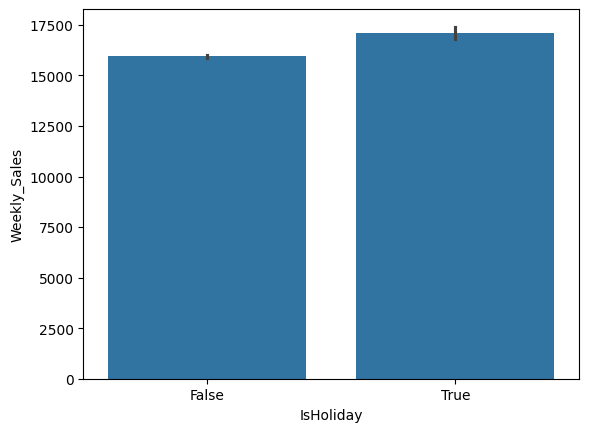

In [387]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df)

In [388]:
df_holiday = df.loc[df['IsHoliday']==True]
df_holiday['Date'].unique() 

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [389]:
df_not_holiday = df.loc[df['IsHoliday']==False]
df_not_holiday['Date'].nunique() 

133

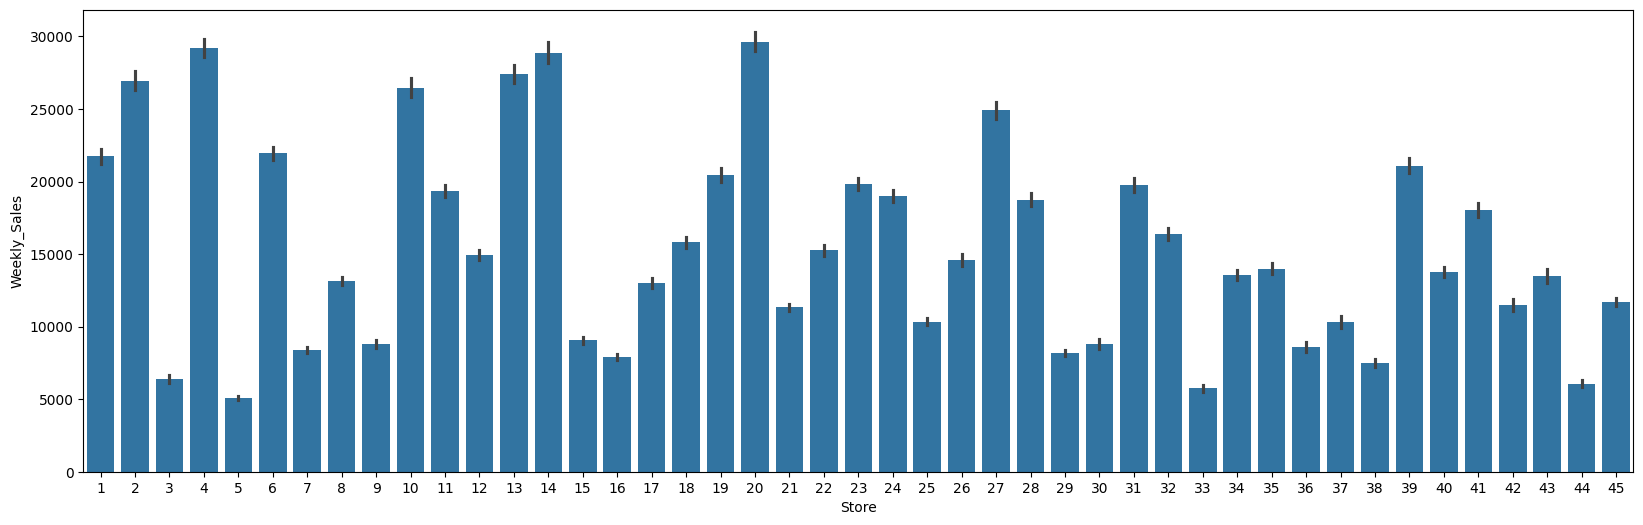

In [390]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df)

In [391]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420212 entries, 0 to 421569
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420212 non-null  int64  
 1   Dept          420212 non-null  int64  
 2   Date          420212 non-null  object 
 3   Weekly_Sales  420212 non-null  float64
 4   IsHoliday     420212 non-null  bool   
 5   Temperature   420212 non-null  float64
 6   Fuel_Price    420212 non-null  float64
 7   CPI           420212 non-null  float64
 8   Unemployment  420212 non-null  float64
 9   Type          420212 non-null  object 
 10  Size          420212 non-null  int64  
dtypes: bool(1), float64(5), int64(3), object(2)
memory usage: 35.7+ MB


<p style="text-align: justify;">Sin embargo, como las fechas se repiten, para poder realizar la serie de tiempo se debe decidir si realizar un modelo global que agrupe las ventas totales por fecha, o un modelo por tienda. Al ser tantas tiendas, se decide la primera opción, realizar una serie de tiempo a nivel global, sumando las ventas por fecha, y promediando el resto.</p>

In [392]:
# Convertimos la columna Date a tipo datetime
df['Date'] = pd.to_datetime(df['Date'])

# Agrupamos por fecha: sumamos las ventas y promediamos el resto
df_global = df.groupby('Date').agg({
    'Weekly_Sales': 'sum',         # sumamos ventas en esa fecha
    'IsHoliday': 'max',            # True si al menos una tienda tuvo festivo
    'Temperature': 'mean',
    'Fuel_Price': 'mean',
    'CPI': 'mean',
    'Unemployment': 'mean'
}).reset_index()

# Ordenamos por fecha ascendente
df_global = df_global.sort_values('Date')
df_global.reset_index(drop=True, inplace=True)

# Revisamos el resultado
df_global

,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,2010-02-05,49750875.98,False,33.282800,2.717968,167.328549,8.578592
1,2010-02-12,48336800.10,True,33.370444,2.695955,167.401961,8.567855
2,2010-02-19,48277902.33,False,37.032596,2.673506,167.386208,8.574593
3,2010-02-26,43970440.65,False,38.624806,2.685486,167.708233,8.562094
4,2010-03-05,46872715.16,False,42.367490,2.731923,167.680036,8.573890
...,...,...,...,...,...,...,...
138,2012-09-28,43735713.56,False,68.163750,3.858017,175.983576,7.222354
139,2012-10-05,47567053.49,False,65.444187,3.848344,176.007152,6.940703
140,2012-10-12,46128909.98,False,57.678090,3.896989,176.161362,6.949037
141,2012-10-19,45122443.96,False,60.148140,3.878274,176.306335,6.947697


<p align="center"><strong>Tabla 1:</strong> Base de datos de ventas semanales a nivel global.</p>

<p align="center"><em style="font-size: smaller;">Elaboración propia.</a></em></p>

In [393]:
# Revisamos frecuencia de fechas
df_global.set_index('Date', inplace=True)
df_global = df_global.asfreq('W-FRI')  # Ajustamos la frecuencia a "semanal, viernes"
df_global.reset_index(inplace=True)

# Ahora df_global tiene un índice semanal uniforme
df_global.head()

,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,CPI,Unemployment
0,2010-02-05,49750875.98,False,33.282800,2.717968,167.328549,8.578592
1,2010-02-12,48336800.10,True,33.370444,2.695955,167.401961,8.567855
2,2010-02-19,48277902.33,False,37.032596,2.673506,167.386208,8.574593
3,2010-02-26,43970440.65,False,38.624806,2.685486,167.708233,8.562094
4,2010-03-05,46872715.16,False,42.367490,2.731923,167.680036,8.573890


In [394]:
# Se convierte la variable IsHoliday a tipo int, donde True=1, False=0
df_global['IsHoliday'] = df_global['IsHoliday'].astype(int)

In [395]:
# Semanalmente, la columna que queremos predecir es "Weekly_Sales"
# En este caso, supondremos que las otras columnas se usarán como entrada.

features = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday', 'Weekly_Sales']
data = df_global[features].copy()
data

,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly_Sales
0,33.282800,2.717968,167.328549,8.578592,0,49750875.98
1,33.370444,2.695955,167.401961,8.567855,1,48336800.10
2,37.032596,2.673506,167.386208,8.574593,0,48277902.33
3,38.624806,2.685486,167.708233,8.562094,0,43970440.65
4,42.367490,2.731923,167.680036,8.573890,0,46872715.16
...,...,...,...,...,...,...
138,68.163750,3.858017,175.983576,7.222354,0,43735713.56
139,65.444187,3.848344,176.007152,6.940703,0,47567053.49
140,57.678090,3.896989,176.161362,6.949037,0,46128909.98
141,60.148140,3.878274,176.306335,6.947697,0,45122443.96


In [396]:
# Para realizar el modelo, necesitamos tener las fechas como índice, y la única columna de las ventas
# Agrupamos por fecha: sumamos las ventas y promediamos el resto
df_model = df.groupby('Date').agg({
    'Weekly_Sales': 'sum',         # sumamos ventas en esa fecha
}).reset_index()

# Ordenamos por fecha ascendente
df_model = df_model.sort_values('Date')
df_model.reset_index(drop=True, inplace=True)
df_model = df_model.set_index("Date")

# Revisamos el resultado
df_model

,Weekly_Sales
Date,
2010-02-05,49750875.98
2010-02-12,48336800.10
2010-02-19,48277902.33
2010-02-26,43970440.65
2010-03-05,46872715.16
...,...
2012-09-28,43735713.56
2012-10-05,47567053.49
2012-10-12,46128909.98


In [397]:
import matplotlib.dates as mdates

def plot_time_series(df, yt_col="Weekly_Sales"):

    plt.figure(figsize=(12, 4))

    # Plot the true time series against the datetime index
    plt.plot(df.index, df[yt_col], ".-k", label=yt_col)

    # If you have forecast columns, plot them as well
    pred_cols = [col for col in df.columns if col.startswith("yt_pred")]
    colors = "rbgcmy"
    for i, col in enumerate(pred_cols):
        plt.plot(df.index, df[col], ".-", color=colors[i], linewidth=0.7, label=col)

    # Make the x‐axis show dates nicely
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # e.g. every 6 months
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    plt.xticks(rotation=90)

    plt.grid(color="lightgray", linestyle="--", linewidth=0.5)
    plt.legend()
    plt.tight_layout()
    plt.show()

<p style="text-align: justify;"> Primero, observamos las ventas en el tiempo. </p>

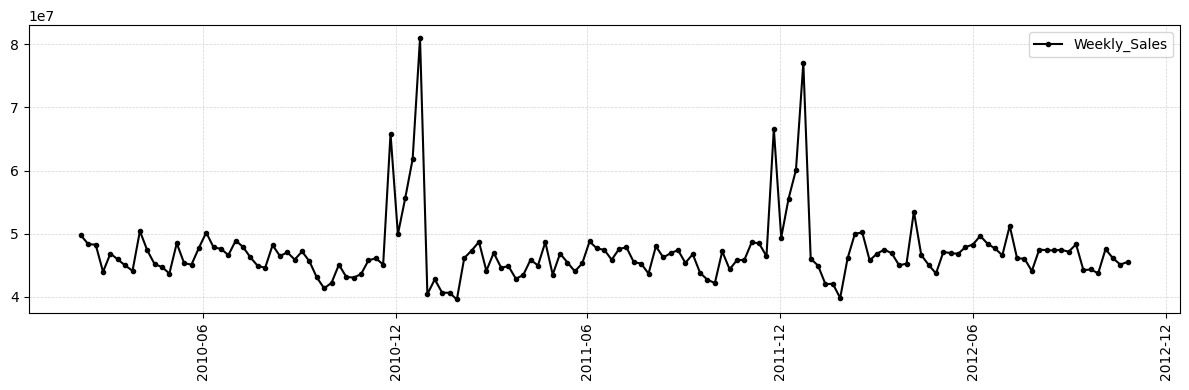

In [398]:
plot_time_series(df_model)

<p align="center"><strong>Figura 1:</strong> Gráfico de tendencia de ventas en el tiempo.</p>

<p align="center"><em style="font-size: smaller;">Elaboración propia.</a></em></p>

<p style="text-align: justify;">Se puede observar que entre los meses de final de año existe un incremento en las ventas semanales. Para observar mejor la tendencia, se grafica la autocorrelación y la autocorrelación parcial.</p>

In [399]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf  

def acf_pacf_plots(z):
    """Correlation plot."""

    def format_plot():
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["bottom"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        plt.gca().collections[0].set_color("k")
        plt.gca().collections[1].set_color("gray")
        plt.grid(color="lightgray", linestyle="--", linewidth=0.5)
        plt.ylim(-1.03, 1.03)
        plt.yticks(fontsize=8)
        plt.xticks(fontsize=8)
        plt.title(plt.gca().get_title(), fontsize=8)

    plt.figure(figsize=(30, 3))

    plt.subplot(1, 2, 1)
    plot_acf(z, lags=70, ax=plt.gca(), color="k")
    format_plot()

    plt.subplot(1, 2, 2)
    plot_pacf(z, lags=70, ax=plt.gca(), color="k")
    format_plot()
    plt.show()

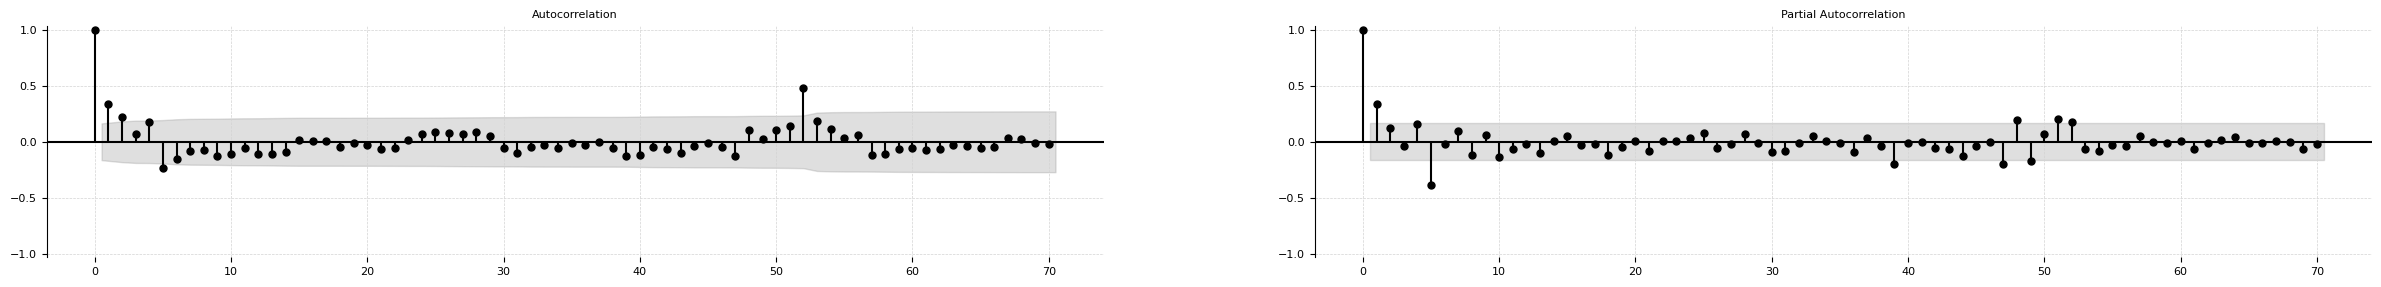

In [400]:
acf_pacf_plots(df_model.Weekly_Sales)

<p align="center"><strong>Figura 2:</strong> Gráficos de Autocorrelación y Autocorrelación Parcial.</p>

<p align="center"><em style="font-size: smaller;">Elaboración propia.</a></em></p>

## ¿Qué es la Autocorrelación y la Autocorrelación Parcial?

<p style="text-align: justify;">El Autocorrelation Function (ACF) mide la correlación entre una serie temporal y sus valores rezagados. Es una herramienta clave para identificar patrones como la estacionalidad y la periodicidad en los datos. Por ejemplo, un alto valor de ACF en un rezago de 52 semanas podría indicar un patrón anual en las ventas (Manoharan, I., 2024).</p>

<p style="text-align: justify;">El Partial Autocorrelation Function (PACF) mide la correlación entre una serie temporal y sus valores rezagados, eliminando el efecto de los rezagos intermedios. Esto es útil para determinar el número de rezagos que deben incluirse en un modelo autoregresivo (AR). Por ejemplo, si el PACF muestra un corte abrupto después del segundo rezago, esto sugiere que un modelo AR(2) podría ser adecuado (Manoharan, I., 2024).</p>

## ¿Por qué es importante conocerlos en el contexto de series de tiempo?

<p style="text-align: justify;">Es importante para realizar la diferenciación en las series de tiempo, con el objetivo de eliminar tendencias y estacionalidad reconocidas en el ACF y PACF. La diferenciación es una técnica utilizada para transformar una serie temporal no estacionaria en una estacionaria, restando el valor de un punto de datos del valor del punto anterior, para garantizar que las propiedades estadísticas de la serie (media, varianza) permanezcan constantes a lo largo del tiempo, y así obtener resultados sin sesgos (Manoharan, I., 2024).</p>

<p style="text-align: justify;">Inicialmente, se reconoce una tendencia cada 52 semanas, por lo que se realiza la primera diferencia con un lag de 52. Así, al volver a observar la tendencia de las ventas en el tiempo y la autocorrelación, se observa lo siguiente:</p>

In [401]:
# Diferenciación con lag=52 para series semanales
df_model['Weekly_Sales_diff52'] = df_model['Weekly_Sales'].diff(52)
display(df_model.Weekly_Sales.head(15))

Date
2010-02-05    49750875.98
2010-02-12    48336800.10
2010-02-19    48277902.33
2010-02-26    43970440.65
2010-03-05    46872715.16
2010-03-12    45926841.32
2010-03-19    44989431.42
2010-03-26    44134583.50
2010-04-02    50424232.22
2010-04-09    47365466.31
2010-04-16    45183702.69
2010-04-23    44734552.03
2010-04-30    43706044.18
2010-05-07    48503424.39
2010-05-14    45330146.41
Name: Weekly_Sales, dtype: float64

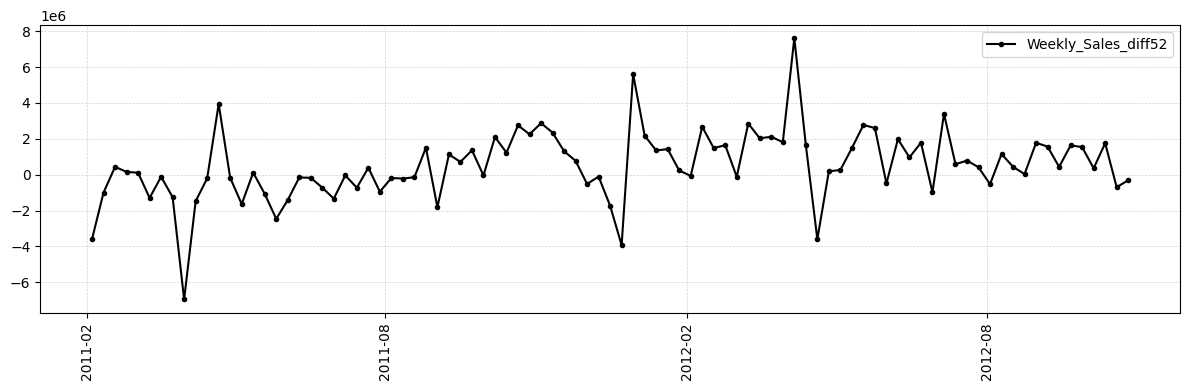

In [402]:
plot_time_series(df_model, yt_col='Weekly_Sales_diff52')

<p align="center"><strong>Figura 3:</strong> Gráficos de tendencia de ventas en el tiempo, luego de realizar la primera diferenciación.</p>

<p align="center"><em style="font-size: smaller;">Elaboración propia.</a></em></p>

In [403]:
def acf_plots(z):
    """Correlation plot."""

    def format_plot():
        plt.gca().spines["top"].set_visible(False)
        plt.gca().spines["bottom"].set_visible(False)
        plt.gca().spines["right"].set_visible(False)
        plt.gca().collections[0].set_color("k")
        plt.gca().collections[1].set_color("gray")
        plt.grid(color="lightgray", linestyle="--", linewidth=0.5)
        plt.ylim(-1.03, 1.03)
        plt.yticks(fontsize=8)
        plt.xticks(fontsize=8)
        plt.title(plt.gca().get_title(), fontsize=8)

    plt.figure(figsize=(30, 3))

    plt.subplot(1, 2, 1)
    plot_acf(z, lags=70, ax=plt.gca(), color="k")
    format_plot()
    plt.show()

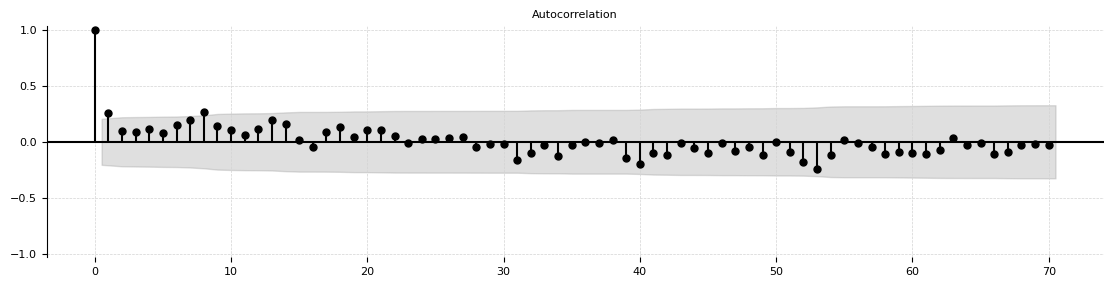

In [404]:
acf_plots(df_model.Weekly_Sales_diff52.dropna())

<p align="center"><strong>Figura 4:</strong> Gráfico de Autocorrelación, luego de realizar la primera diferenciación.</p>

<p align="center"><em style="font-size: smaller;">Elaboración propia.</a></em></p>

In [405]:
def make_lagged_ts(df, p_max, y_column, fmt="lagged_{}m"):
    for i in range(1, p_max + 1):
        df[fmt.format(i)] = df[y_column].shift(i)
    return df

In [406]:
df_model2 = make_lagged_ts(
    df=df_model,
    p_max=53,
    y_column="Weekly_Sales_diff52",
    fmt="lagged_{}m",
)
df_model2

,Weekly_Sales,Weekly_Sales_diff52,lagged_1m,lagged_2m,lagged_3m,lagged_4m,lagged_5m,lagged_6m,lagged_7m,lagged_8m,...,lagged_44m,lagged_45m,lagged_46m,lagged_47m,lagged_48m,lagged_49m,lagged_50m,lagged_51m,lagged_52m,lagged_53m
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-05,49750875.98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-12,48336800.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-19,48277902.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-26,43970440.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-05,46872715.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,43735713.56,1538323.89,1635805.60,432826.27,1566688.61,1778852.53,32323.04,437631.47,1153953.00,-530756.85,...,772619.59,1312618.10,2349376.90,2873584.08,2252715.37,2752922.79,1223929.51,2103943.10,-42647.94,1359459.51
2012-10-05,47567053.49,355025.56,1538323.89,1635805.60,432826.27,1566688.61,1778852.53,32323.04,437631.47,1153953.00,...,-520029.76,772619.59,1312618.10,2349376.90,2873584.08,2252715.37,2752922.79,1223929.51,2103943.10,-42647.94
2012-10-12,46128909.98,1753571.03,355025.56,1538323.89,1635805.60,432826.27,1566688.61,1778852.53,32323.04,437631.47,...,-106282.30,-520029.76,772619.59,1312618.10,2349376.90,2873584.08,2252715.37,2752922.79,1223929.51,2103943.10


<p style="text-align: justify;">Así, se crean las nuevas columnas correspondientes a las diferencias para las 52 semanas, por lo que cada registro contiene el valor de ventas de dicha semana, pero adicionalmente por cada columna, el valor de la diferencia de una semana atrás, dos semanas atrás, y así consecutivamente hasta 52 semanas atrás, por lo que que también se eliminan aquellos registros que no tengan los registros anteriores correspondientes, ya que para entrenar al modelo no se pueden tener valores nulos. </p>

In [407]:
df_dropna = df_model2.dropna()
df_dropna

,Weekly_Sales,Weekly_Sales_diff52,lagged_1m,lagged_2m,lagged_3m,lagged_4m,lagged_5m,lagged_6m,lagged_7m,lagged_8m,...,lagged_44m,lagged_45m,lagged_46m,lagged_47m,lagged_48m,lagged_49m,lagged_50m,lagged_51m,lagged_52m,lagged_53m
Date,,,,,,,,,,,,,,,,,,,,,
2012-02-10,50010196.60,2673379.70,-67800.93,234740.65,1427210.01,1349662.53,2179448.93,5609560.49,-3931812.63,-1734594.69,...,-1477375.82,-6964404.10,-1256582.50,-116785.17,-1298345.02,108149.43,155579.20,438292.33,-999983.20,-3597265.24
2012-02-17,50197325.48,1481130.82,2673379.70,-67800.93,234740.65,1427210.01,1349662.53,2179448.93,5609560.49,-3931812.63,...,-209508.78,-1477375.82,-6964404.10,-1256582.50,-116785.17,-1298345.02,108149.43,155579.20,438292.33,-999983.20
2012-02-24,45771879.72,1645859.87,1481130.82,2673379.70,-67800.93,234740.65,1427210.01,1349662.53,2179448.93,5609560.49,...,3942230.57,-209508.78,-1477375.82,-6964404.10,-1256582.50,-116785.17,-1298345.02,108149.43,155579.20,438292.33
2012-03-02,46861342.89,-119521.70,1645859.87,1481130.82,2673379.70,-67800.93,234740.65,1427210.01,1349662.53,2179448.93,...,-175837.69,3942230.57,-209508.78,-1477375.82,-6964404.10,-1256582.50,-116785.17,-1298345.02,108149.43,155579.20
2012-03-09,47482677.99,2854181.69,-119521.70,1645859.87,1481130.82,2673379.70,-67800.93,234740.65,1427210.01,1349662.53,...,-1641355.77,-175837.69,3942230.57,-209508.78,-1477375.82,-6964404.10,-1256582.50,-116785.17,-1298345.02,108149.43
2012-03-16,46902365.23,2029718.98,2854181.69,-119521.70,1645859.87,1481130.82,2673379.70,-67800.93,234740.65,1427210.01,...,116228.94,-1641355.77,-175837.69,3942230.57,-209508.78,-1477375.82,-6964404.10,-1256582.50,-116785.17,-1298345.02
2012-03-23,44994361.91,2116360.91,2029718.98,2854181.69,-119521.70,1645859.87,1481130.82,2673379.70,-67800.93,234740.65,...,-1073299.75,116228.94,-1641355.77,-175837.69,3942230.57,-209508.78,-1477375.82,-6964404.10,-1256582.50,-116785.17
2012-03-30,45273064.44,1813236.32,2116360.91,2029718.98,2854181.69,-119521.70,1645859.87,1481130.82,2673379.70,-67800.93,...,-2464100.28,-1073299.75,116228.94,-1641355.77,-175837.69,3942230.57,-209508.78,-1477375.82,-6964404.10,-1256582.50
2012-04-06,53502476.06,7614385.57,1813236.32,2116360.91,2029718.98,2854181.69,-119521.70,1645859.87,1481130.82,2673379.70,...,-1416662.24,-2464100.28,-1073299.75,116228.94,-1641355.77,-175837.69,3942230.57,-209508.78,-1477375.82,-6964404.10


<p align="center"><strong>Tabla 2:</strong> Base de datos transformada con la primera diferenciación.</p>

<p align="center"><em style="font-size: smaller;">Elaboración propia.</a></em></p>

# Modelo de Red Neuronal

<p style="text-align: justify;">El modelo desarrollado se basa en una Red Neuronal Multicapa (MLP) para la predicción de la demanda semanal agregada en un entorno de comercio electrónico. Como se explicó anteriormente, se sumaron las ventas de todas las tiendas y departamentos para obtener un valor de ventas semanales “global”. Luego, se aplicó una diferenciación estacional (lag de 52 semanas) para eliminar tendencias anuales y, así, lograr una serie más estacionaria. </p>

<p style="text-align: justify;">Seguidamente, se crearon las variables rezagadas (lags) hasta 52 semanas atrás, de tal manera que el modelo pudiera observar el comportamiento de las ventas en semanas anteriores y, con ello, inferir la siguiente venta a predecir.</p>

<p style="text-align: justify;">Con esta base de datos transformada, se construyó un MLPRegressor (dentro de un pipeline) que, gracias a la escalación de variables con MinMaxScaler, consigue ajustarse a la magnitud de las ventas y aprende las dependencias temporales presentes en la serie.</p>

In [408]:
def train_test_split(df, x_columns, y_column):
    """Train test split using last 24 observations as test set."""

    X_complete = df[x_columns]
    y_complete = df[y_column]

    X_train = df[x_columns].iloc[:-10]
    y_train = df[y_column].iloc[:-10]

    X_test = df[x_columns].iloc[-10:]
    y_test = df[y_column].iloc[-10:]

    return X_complete, y_complete, X_train, y_train, X_test, y_test

In [409]:
#
# División de los datos en entrenamiento y prueba
#
(
    X_complete,
    y_complete,
    X_train,
    y_train,
    X_test,
    y_test,
) = train_test_split(
    df=df_dropna,
    x_columns=[f"lagged_{i}m" for i in range(1, 53)],
    y_column="Weekly_Sales_diff52",
)
X_complete.head()

,lagged_1m,lagged_2m,lagged_3m,lagged_4m,lagged_5m,lagged_6m,lagged_7m,lagged_8m,lagged_9m,lagged_10m,...,lagged_43m,lagged_44m,lagged_45m,lagged_46m,lagged_47m,lagged_48m,lagged_49m,lagged_50m,lagged_51m,lagged_52m
Date,,,,,,,,,,,,,,,,,,,,,
2012-02-10,-67800.93,234740.65,1427210.01,1349662.53,2179448.93,5609560.49,-3931812.63,-1734594.69,-106282.30,-520029.76,...,-209508.78,-1477375.82,-6964404.10,-1256582.50,-116785.17,-1298345.02,108149.43,155579.20,438292.33,-999983.20
2012-02-17,2673379.70,-67800.93,234740.65,1427210.01,1349662.53,2179448.93,5609560.49,-3931812.63,-1734594.69,-106282.30,...,3942230.57,-209508.78,-1477375.82,-6964404.10,-1256582.50,-116785.17,-1298345.02,108149.43,155579.20,438292.33
2012-02-24,1481130.82,2673379.70,-67800.93,234740.65,1427210.01,1349662.53,2179448.93,5609560.49,-3931812.63,-1734594.69,...,-175837.69,3942230.57,-209508.78,-1477375.82,-6964404.10,-1256582.50,-116785.17,-1298345.02,108149.43,155579.20
2012-03-02,1645859.87,1481130.82,2673379.70,-67800.93,234740.65,1427210.01,1349662.53,2179448.93,5609560.49,-3931812.63,...,-1641355.77,-175837.69,3942230.57,-209508.78,-1477375.82,-6964404.10,-1256582.50,-116785.17,-1298345.02,108149.43
2012-03-09,-119521.70,1645859.87,1481130.82,2673379.70,-67800.93,234740.65,1427210.01,1349662.53,2179448.93,5609560.49,...,116228.94,-1641355.77,-175837.69,3942230.57,-209508.78,-1477375.82,-6964404.10,-1256582.50,-116785.17,-1298345.02


In [410]:
X_complete

,lagged_1m,lagged_2m,lagged_3m,lagged_4m,lagged_5m,lagged_6m,lagged_7m,lagged_8m,lagged_9m,lagged_10m,...,lagged_43m,lagged_44m,lagged_45m,lagged_46m,lagged_47m,lagged_48m,lagged_49m,lagged_50m,lagged_51m,lagged_52m
Date,,,,,,,,,,,,,,,,,,,,,
2012-02-10,-67800.93,234740.65,1427210.01,1349662.53,2179448.93,5609560.49,-3931812.63,-1734594.69,-106282.30,-520029.76,...,-209508.78,-1477375.82,-6964404.10,-1256582.50,-116785.17,-1298345.02,108149.43,155579.20,438292.33,-999983.20
2012-02-17,2673379.70,-67800.93,234740.65,1427210.01,1349662.53,2179448.93,5609560.49,-3931812.63,-1734594.69,-106282.30,...,3942230.57,-209508.78,-1477375.82,-6964404.10,-1256582.50,-116785.17,-1298345.02,108149.43,155579.20,438292.33
2012-02-24,1481130.82,2673379.70,-67800.93,234740.65,1427210.01,1349662.53,2179448.93,5609560.49,-3931812.63,-1734594.69,...,-175837.69,3942230.57,-209508.78,-1477375.82,-6964404.10,-1256582.50,-116785.17,-1298345.02,108149.43,155579.20
2012-03-02,1645859.87,1481130.82,2673379.70,-67800.93,234740.65,1427210.01,1349662.53,2179448.93,5609560.49,-3931812.63,...,-1641355.77,-175837.69,3942230.57,-209508.78,-1477375.82,-6964404.10,-1256582.50,-116785.17,-1298345.02,108149.43
2012-03-09,-119521.70,1645859.87,1481130.82,2673379.70,-67800.93,234740.65,1427210.01,1349662.53,2179448.93,5609560.49,...,116228.94,-1641355.77,-175837.69,3942230.57,-209508.78,-1477375.82,-6964404.10,-1256582.50,-116785.17,-1298345.02
2012-03-16,2854181.69,-119521.70,1645859.87,1481130.82,2673379.70,-67800.93,234740.65,1427210.01,1349662.53,2179448.93,...,-1073299.75,116228.94,-1641355.77,-175837.69,3942230.57,-209508.78,-1477375.82,-6964404.10,-1256582.50,-116785.17
2012-03-23,2029718.98,2854181.69,-119521.70,1645859.87,1481130.82,2673379.70,-67800.93,234740.65,1427210.01,1349662.53,...,-2464100.28,-1073299.75,116228.94,-1641355.77,-175837.69,3942230.57,-209508.78,-1477375.82,-6964404.10,-1256582.50
2012-03-30,2116360.91,2029718.98,2854181.69,-119521.70,1645859.87,1481130.82,2673379.70,-67800.93,234740.65,1427210.01,...,-1416662.24,-2464100.28,-1073299.75,116228.94,-1641355.77,-175837.69,3942230.57,-209508.78,-1477375.82,-6964404.10
2012-04-06,1813236.32,2116360.91,2029718.98,2854181.69,-119521.70,1645859.87,1481130.82,2673379.70,-67800.93,234740.65,...,-156760.26,-1416662.24,-2464100.28,-1073299.75,116228.94,-1641355.77,-175837.69,3942230.57,-209508.78,-1477375.82


In [411]:
X_train

,lagged_1m,lagged_2m,lagged_3m,lagged_4m,lagged_5m,lagged_6m,lagged_7m,lagged_8m,lagged_9m,lagged_10m,...,lagged_43m,lagged_44m,lagged_45m,lagged_46m,lagged_47m,lagged_48m,lagged_49m,lagged_50m,lagged_51m,lagged_52m
Date,,,,,,,,,,,,,,,,,,,,,
2012-02-10,-67800.93,234740.65,1427210.01,1349662.53,2179448.93,5609560.49,-3931812.63,-1734594.69,-106282.30,-520029.76,...,-209508.78,-1477375.82,-6964404.10,-1256582.50,-116785.17,-1298345.02,108149.43,155579.20,438292.33,-999983.20
2012-02-17,2673379.70,-67800.93,234740.65,1427210.01,1349662.53,2179448.93,5609560.49,-3931812.63,-1734594.69,-106282.30,...,3942230.57,-209508.78,-1477375.82,-6964404.10,-1256582.50,-116785.17,-1298345.02,108149.43,155579.20,438292.33
2012-02-24,1481130.82,2673379.70,-67800.93,234740.65,1427210.01,1349662.53,2179448.93,5609560.49,-3931812.63,-1734594.69,...,-175837.69,3942230.57,-209508.78,-1477375.82,-6964404.10,-1256582.50,-116785.17,-1298345.02,108149.43,155579.20
2012-03-02,1645859.87,1481130.82,2673379.70,-67800.93,234740.65,1427210.01,1349662.53,2179448.93,5609560.49,-3931812.63,...,-1641355.77,-175837.69,3942230.57,-209508.78,-1477375.82,-6964404.10,-1256582.50,-116785.17,-1298345.02,108149.43
2012-03-09,-119521.70,1645859.87,1481130.82,2673379.70,-67800.93,234740.65,1427210.01,1349662.53,2179448.93,5609560.49,...,116228.94,-1641355.77,-175837.69,3942230.57,-209508.78,-1477375.82,-6964404.10,-1256582.50,-116785.17,-1298345.02
2012-03-16,2854181.69,-119521.70,1645859.87,1481130.82,2673379.70,-67800.93,234740.65,1427210.01,1349662.53,2179448.93,...,-1073299.75,116228.94,-1641355.77,-175837.69,3942230.57,-209508.78,-1477375.82,-6964404.10,-1256582.50,-116785.17
2012-03-23,2029718.98,2854181.69,-119521.70,1645859.87,1481130.82,2673379.70,-67800.93,234740.65,1427210.01,1349662.53,...,-2464100.28,-1073299.75,116228.94,-1641355.77,-175837.69,3942230.57,-209508.78,-1477375.82,-6964404.10,-1256582.50
2012-03-30,2116360.91,2029718.98,2854181.69,-119521.70,1645859.87,1481130.82,2673379.70,-67800.93,234740.65,1427210.01,...,-1416662.24,-2464100.28,-1073299.75,116228.94,-1641355.77,-175837.69,3942230.57,-209508.78,-1477375.82,-6964404.10
2012-04-06,1813236.32,2116360.91,2029718.98,2854181.69,-119521.70,1645859.87,1481130.82,2673379.70,-67800.93,234740.65,...,-156760.26,-1416662.24,-2464100.28,-1073299.75,116228.94,-1641355.77,-175837.69,3942230.57,-209508.78,-1477375.82


In [412]:
X_test

,lagged_1m,lagged_2m,lagged_3m,lagged_4m,lagged_5m,lagged_6m,lagged_7m,lagged_8m,lagged_9m,lagged_10m,...,lagged_43m,lagged_44m,lagged_45m,lagged_46m,lagged_47m,lagged_48m,lagged_49m,lagged_50m,lagged_51m,lagged_52m
Date,,,,,,,,,,,,,,,,,,,,,
2012-08-24,437631.47,1153953.00,-530756.85,413913.29,785356.90,583779.14,3393911.56,-983330.48,1783194.25,964823.08,...,2252715.37,2752922.79,1223929.51,2103943.10,-42647.94,1359459.51,712320.74,1128341.76,-1813775.52,1506884.89
2012-08-31,32323.04,437631.47,1153953.00,-530756.85,413913.29,785356.90,583779.14,3393911.56,-983330.48,1783194.25,...,2873584.08,2252715.37,2752922.79,1223929.51,2103943.10,-42647.94,1359459.51,712320.74,1128341.76,-1813775.52
2012-09-07,1778852.53,32323.04,437631.47,1153953.00,-530756.85,413913.29,785356.90,583779.14,3393911.56,-983330.48,...,2349376.90,2873584.08,2252715.37,2752922.79,1223929.51,2103943.10,-42647.94,1359459.51,712320.74,1128341.76
2012-09-14,1566688.61,1778852.53,32323.04,437631.47,1153953.00,-530756.85,413913.29,785356.90,583779.14,3393911.56,...,1312618.10,2349376.90,2873584.08,2252715.37,2752922.79,1223929.51,2103943.10,-42647.94,1359459.51,712320.74
2012-09-21,432826.27,1566688.61,1778852.53,32323.04,437631.47,1153953.00,-530756.85,413913.29,785356.90,583779.14,...,772619.59,1312618.10,2349376.90,2873584.08,2252715.37,2752922.79,1223929.51,2103943.10,-42647.94,1359459.51
2012-09-28,1635805.60,432826.27,1566688.61,1778852.53,32323.04,437631.47,1153953.00,-530756.85,413913.29,785356.90,...,-520029.76,772619.59,1312618.10,2349376.90,2873584.08,2252715.37,2752922.79,1223929.51,2103943.10,-42647.94
2012-10-05,1538323.89,1635805.60,432826.27,1566688.61,1778852.53,32323.04,437631.47,1153953.00,-530756.85,413913.29,...,-106282.30,-520029.76,772619.59,1312618.10,2349376.90,2873584.08,2252715.37,2752922.79,1223929.51,2103943.10
2012-10-12,355025.56,1538323.89,1635805.60,432826.27,1566688.61,1778852.53,32323.04,437631.47,1153953.00,-530756.85,...,-1734594.69,-106282.30,-520029.76,772619.59,1312618.10,2349376.90,2873584.08,2252715.37,2752922.79,1223929.51
2012-10-19,1753571.03,355025.56,1538323.89,1635805.60,432826.27,1566688.61,1778852.53,32323.04,437631.47,1153953.00,...,-3931812.63,-1734594.69,-106282.30,-520029.76,772619.59,1312618.10,2349376.90,2873584.08,2252715.37,2752922.79


In [413]:
# Pronóstico usando una red neuronal tipo MLP

from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.compose import TransformedTargetRegressor 
from sklearn.neural_network import MLPRegressor 


# Creamos un pipeline para automatizar la creacion de un modelo
def make_pipeline_from_model(model):
    """
    Crea un pipeline que escala features y la variable objetivo
    para entrenar un modelo de regresión.
    """
    return Pipeline(
        [
            # Se escalan las variables de entrada con MinMaxScaler
            ("scaler", MinMaxScaler()),

            # TransformedTargetRegressor escala también la variable objetivo
            (
                "regressor",
                TransformedTargetRegressor(
                    regressor=model,
                    transformer=MinMaxScaler()
                ),
            ),
        ]
    )

<p align="center"><strong>Figura 5:</strong> Código del pipeline para crear el modelo de red neuronal MLP.</p>

<p align="center"><em style="font-size: smaller;">Elaboración propia.</a></em></p>

<p style="text-align: justify;">Para encontrar la configuración óptima de la red neuronal, se utilizó GridSearchCV, evaluando diferentes configuraciones de: </p>

1. Capas ocultas (hidden_layer_sizes), donde se probaron combinaciones de una y dos capas con distinto número de neuronas.
2. Función de activación (activation), incluyendo ‘logistic’, ‘tanh’ y ‘relu’.
3. Learning_rate_init, que determina la tasa de aprendizaje inicial en cada iteración.
4. Momentum, para equilibrar la velocidad de convergencia y la estabilidad en la optimización.

<p style="text-align: justify;">El GridSearchCV se basó en la métrica de MSE (Mean Squared Error) y se realizó una validación cruzada con 3 particiones. Finalmente, la mejor configuración de hiperparámetros hallada fue: </p>

In [414]:
# Definimos el modelo base y la rejilla de hiperparámetros

mlp_base = MLPRegressor(max_iter=5000, random_state=123, learning_rate="adaptive")

# Definimos la rejilla de hiperparámetros a explorar
param_grid = {
    # Como el MLP está dentro de TransformedTargetRegressor, 
    # se accede a sus hiperparámetros con 'regressor__regressor__'
    "regressor__regressor__hidden_layer_sizes": [(8,), (16,), (32,), (8, 8)],
    "regressor__regressor__activation": ["logistic", "tanh", "relu"],
    "regressor__regressor__learning_rate_init": [0.1, 0.01, 0.001],
    "regressor__regressor__momentum": [0.0, 0.01, 0.1, 0.9],
}

In [415]:
from sklearn.model_selection import GridSearchCV

# Creamos el pipeline y configuramos el GridSearchCV
pipeline = make_pipeline_from_model(mlp_base)

# Configuramos GridSearchCV para que compare modelos según MSE
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",  # se usa el negativo de MSE como convención en sklearn
    cv=3,  # número de particiones para validación cruzada
    verbose=1,
    n_jobs=-1  # para usar todos los núcleos disponibles
)


In [416]:
# Ajustamos el GridSearchCV
grid_search.fit(X_train, y_train)

# Una vez finalizada la búsqueda, extraemos el mejor modelo
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Mejores hiperparámetros encontrados:
{'regressor__regressor__activation': 'logistic', 'regressor__regressor__hidden_layer_sizes': (8, 8), 'regressor__regressor__learning_rate_init': 0.001, 'regressor__regressor__momentum': 0.0}


<p align="center"><strong>Figura 6:</strong> Mejores hiperparámetros obtenidos luego del GridSearchCV.</p>

<p align="center"><em style="font-size: smaller;">Elaboración propia.</a></em></p>

In [417]:
# Predicciones
y_train_pred = best_model.predict(X_train)
y_test_pred  = best_model.predict(X_test)

In [418]:
# Predecimos para todas las semanas
y_pred = best_model.predict(X_complete)

# Guardamos las predicciones
df_dropna["yt_pred_mlp"] = y_pred

Así, se puede ver gráficamente la predicción realizada por el modelo:

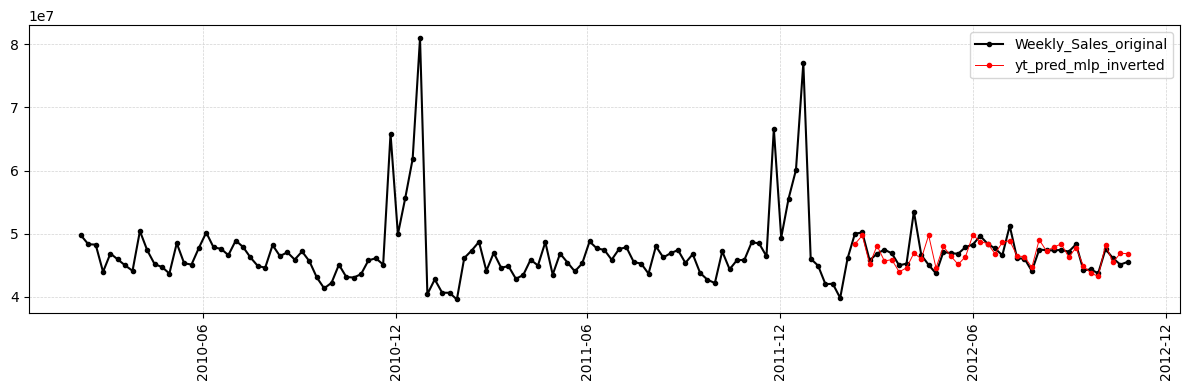

In [419]:
# Conservamos las ventas originales en una columna aparte
df_model["Weekly_Sales_original"] = df_model["Weekly_Sales"]  # copia de seguridad

# Mantenemos en otra columna los datos ya diferenciados a 52 semanas
df_model["Weekly_Sales_diff52"] = df_model["Weekly_Sales_original"].diff(52)

# Invertimos las predicciones a escala original
df_dropna["Weekly_Sales_lag52"] = df_model["Weekly_Sales_original"].shift(52)

df_dropna["yt_pred_mlp_inverted"] = (
    df_dropna["yt_pred_mlp"]  # predicción en diferencia
    + df_dropna["Weekly_Sales_lag52"]  # rezago 52 semanas
)

# Almacenamos el resultado invertido también en df_model
df_model.loc[df_dropna.index, "yt_pred_mlp_inverted"] = df_dropna["yt_pred_mlp_inverted"]

# 4) Graficamos usando la escala original de ventas
plot_time_series(
    df=df_model, 
    yt_col="Weekly_Sales_original"  # la serie real (sin diferenciar)
)


<p align="center"><strong>Figura 7:</strong> Gráfico de ventas originales con la predicción realizada por el modelo.</p>

<p align="center"><em style="font-size: smaller;">Elaboración propia.</a></em></p>

Las métricas obtenidas fueron las siguientes:

In [420]:
# Calculamos el MSE, RMSE y MAE para Train y Test

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test  = mean_squared_error(y_test,  y_test_pred)

rmse_train = np.sqrt(mse_train)
rmse_test  = np.sqrt(mse_test)

mae_train  = mean_absolute_error(y_train, y_train_pred)
mae_test   = mean_absolute_error(y_test,  y_test_pred)

print("Métricas en TRAIN:")
print(f"   MSE:  {mse_train:.4f}")
print(f"   RMSE: {rmse_train:.4f}")
print(f"   MAE:  {mae_train:.4f}")

print("\nMétricas en TEST:")
print(f"   MSE:  {mse_test:.4f}")
print(f"   RMSE: {rmse_test:.4f}")
print(f"   MAE:  {mae_test:.4f}")

Métricas en TRAIN:
   MSE:  3559568461123.0151
   RMSE: 1886681.8654
   MAE:  1317205.4377

Métricas en TEST:
   MSE:  856572944557.1877
   RMSE: 925512.2606
   MAE:  841264.9445


<p align="center"><strong>Figura 8: </strong>Métricas del modelo MLP.</p>

<p align="center"><em style="font-size: smaller;">Elaboración propia.</a></em></p>

In [421]:
# 1) Creamos un DataFrame con la fecha y la predicción invertida
df_pred = (
    df_model[["yt_pred_mlp_inverted"]]
    .dropna()       # para quitar filas sin predicción
    .reset_index()  # 'Date' pasa de índice a columna normal
)

# 2) Renombrar las columnas
df_pred.rename(
    columns={
        "Date": "fecha_inicio_semana",        # la antigua columna del índice
        "yt_pred_mlp_inverted": "ventas_semana"
    },
    inplace=True
)

# 3) Convertimos la fecha a string con formato yyyy-mm-dd
df_pred["fecha_inicio_semana"] = df_pred["fecha_inicio_semana"].dt.strftime("%Y-%m-%d")

# 4) Guardamos en formato CSV con dos decimales para "ventas_semana"
df_pred.to_csv("predicciones_mlp.csv", index=False, float_format="%.2f")


# Interpretación de Resultados

<p style="text-align: justify;">En primer lugar, se observa que la magnitud de las ventas es muy alta (del orden de millones semanales), de modo que era de esperarse que tanto el MSE como el RMSE presentaran valores elevados. Sin embargo, la comparación entre TRAIN y TEST muestra que los errores en el conjunto de prueba se reducen significativamente con respecto al entrenamiento (lo que en este caso se traduce en un MSE más bajo en test que en train). Esto puede indicar que, pese a la complejidad de los datos, el modelo está generalizando razonablemente y no está sobreajustando de manera severa. </p>

<p style="text-align: justify;">La gráfica adjunta permite verificar visualmente la aproximación de la curva roja (predicción invertida) respecto a la negra (ventas originales). Aunque se aprecian picos muy marcados en ciertas épocas del año (probablemente correspondientes a temporadas de alta demanda como navidades), en términos generales, la red neuronal captura la tendencia promedio y los niveles de ventas con una variabilidad aceptable. </p>

# Conclusiones

<p style="text-align: justify;">- El enfoque de diferenciación estacional resultó adecuado para estabilizar la serie temporal, permitiendo que el MLP aprendiera patrones con mayor facilidad. </p>

<p style="text-align: justify;">- La diferencia observada entre las predicciones y la realidad en picos muy altos sugiere que, si bien el modelo logra capturar la dinámica general de la serie, los valores extremos (festividades, campañas de gran impacto) se benefician de características adicionales o de un modelado especializado.</p>

<p style="text-align: justify;">- Debido a la ausencia de datos suficientes (dado que del total de semanas del dataset, se descartaron semanas por el proceso de diferenciación, y finalmente fueron solo 28 semanas en el conjunto de entrenamiento y 10 en el conjunto de prueba), entrenar con modelos más complejos como LSTM o GRU empeoraba los resultados en vez de mejorarlos, por lo que se sugiere mejorar el ejercicio con un dataset más robusto en cuanto a número de semanas, no número de tiendas y departamentos por tienda, porque lo que robustese una serie de tiempo es los datos históricos.</p>

# Referencias

[1] Ali, N., & Shah, W. (2024). Predicting Retail Sales for Walmart: A Comprehensive Study Integrating Machine Learning and Time Series Models. Recuperado de: https://www.researchgate.net/publication/385518162_Predicting_Retail_Sales_for_Walmart_A_Comprehensive_Study_Integrating_Machine_Learning_and_Time_Series_Models#:~:text=to%20align%20their%20operations,reducing%20excess%20inventory%20and

[2] Mrabet, Z. (12 de mayo de 2024). Forecasting time series with multilayer perceptrons in Python. Medium. Recuperado de: https://medium.com/@mrabet_zakariae/forecasting-time-series-with-multilayer-perceptrons-in-python-c7441bda5b59

[3] Penn State Eberly College of Science. (2024). STAT 510: Applied Time Series Analysis. Recuperado de: https://online.stat.psu.edu/stat510/lesson/4/4.1

[4] GeeksforGeeks. (22 de noviembre de 2023). Autocorrelation and partial autocorrelation. Recuperado de: https://www.geeksforgeeks.org/autocorrelation-and-partial-autocorrelation/

[5] Manoharan, I. (28 de febrero de 2024). Fundamentals of time series analysis. Medium. Recuperado de: https://medium.com/thedeephub/146-fundamentals-of-time-series-analysis-d5a358535692

[6] Pandian, S. (6 de marzo de 2025). A comprehensive guide to time series analysis. Recuperado de: https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-to-time-series-analysis/

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a6e9326e-f0e1-4fd1-9a58-0bfc49976ca3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>